# Titanic survived Project 


Project Description
The Titanic Problem is based on the sinking of the ‘Unsinkable’ ship Titanic in early 1912. It gives you information about multiple people like their ages, sexes, sibling counts, embarkment points, and whether or not they survived the disaster. 
Based on these features, you have to predict if an arbitrary passenger on Titanic would survive the sinking or not. 

Attribute Information
Passenger id- Unique Id of the passenger
Pclass- Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)
Survived- Survived (0 = No; 1 = Yes)
Name- Name of the passenger
Sex- Sex of the passenger (Male, Female)
Age- Age of the passenger
Sibsp- Number of Siblings/Spouses Aboard
Parch- Number of Parents/Children Aboard
Ticket- Ticket Number
Fare- Passenger Fare (British pound)
Cabin- Cabin
Embarked- Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)

In [4]:
# importing the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import warnings
warnings.filterwarnings("ignore")

In [5]:
#Loading the dataset
titanic_df = pd.read_csv("titanic_train.csv")
print("Successfully Imported Data!")
titanic_df

Successfully Imported Data!


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [6]:
titanic_df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [7]:
titanic_df.tail(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
881,882,0,3,"Markun, Mr. Johann",male,33.0,0,0,349257,7.8958,NaN,S
882,883,0,3,"Dahlberg, Miss. Gerda Ulrika",female,22.0,0,0,7552,10.5167,NaN,S
883,884,0,2,"Banfield, Mr. Frederick James",male,28.0,0,0,C.A./SOTON 34068,10.5000,NaN,S
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.7500,NaN,Q


# Starting the EDA

In [8]:
# Checking dimension of Datas
titanic_df.shape

(891, 12)

- This dataset contains 891 rows and 12 columns out of which 11 are features and 1 is label(output)

In [9]:
# Checking data type
titanic_df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

- from above observation we find that , there are 5 integer column, 5 object column, 2 float column

In [10]:
# Checking for null values if any
titanic_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

- Age has 177 null values, Cabin has 687 null values and Embarked has 2 null values

<AxesSubplot:>

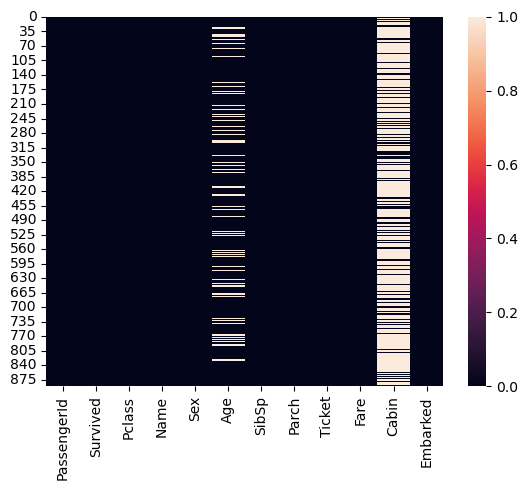

In [11]:
sns.heatmap(titanic_df.isnull())

# Setting PassengerId  as DataFrame INdex

In [12]:
titanic_df.set_index('PassengerId',inplace=True)

In [13]:
titanic_df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


# Data Visualization

<AxesSubplot:xlabel='Survived', ylabel='count'>

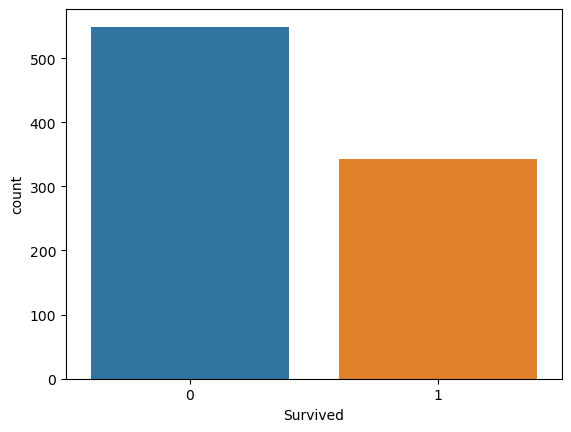

In [14]:
sns.countplot(x='Survived',data=titanic_df)

- As per our dataset nearby 360 peoples were survived.

<AxesSubplot:xlabel='Survived', ylabel='count'>

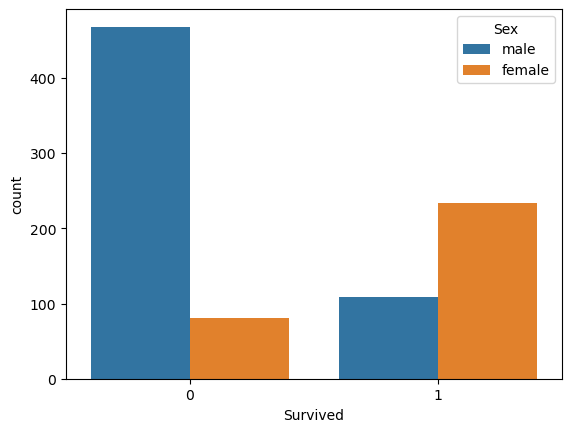

In [15]:
sns.countplot(x="Survived", data=titanic_df,hue='Sex')

- here we can see that females were survived more than male

<AxesSubplot:xlabel='Survived', ylabel='count'>

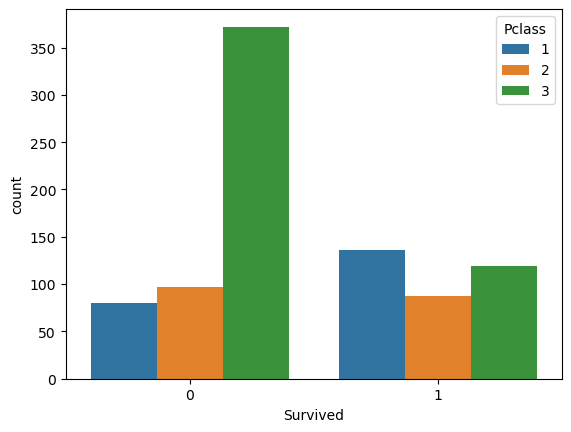

In [16]:
sns.countplot(x="Survived", data=titanic_df,hue='Pclass')

- we see that class 1 people survived most and class 2 people are survived less

- other observation is most of the class 3 people are not survived

<AxesSubplot:xlabel='SibSp', ylabel='count'>

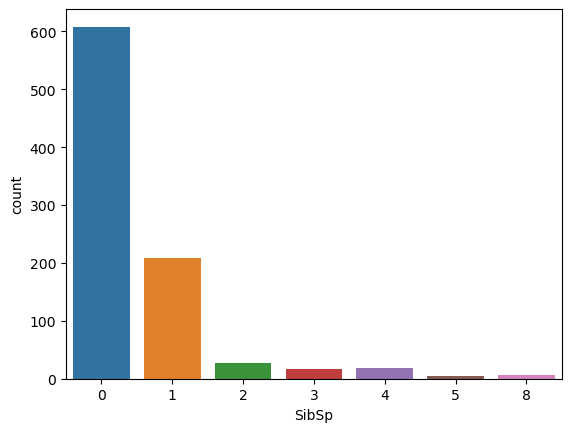

In [17]:
sns.countplot(titanic_df['SibSp'])

- We can see approx 600 peoples having no siblings with them.
- Approx 200 peoples having seblings with them

<AxesSubplot:xlabel='Age', ylabel='count'>

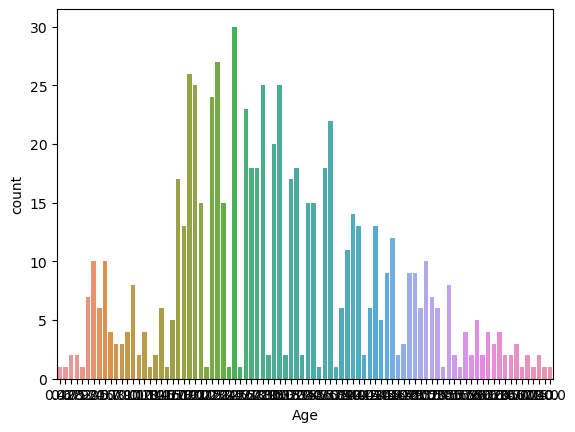

In [18]:
sns.countplot(titanic_df['Age'])

# Data cleaning

# Filling Nan values for age

In [19]:
# Calculate the mean of the age column
mean_age = titanic_df['Age'].mean()
# Fill the missing values with the mean value
titanic_df['Age'] = titanic_df['Age'].fillna(mean_age)

In [20]:
titanic_df['Age'].count()

891

In [21]:
#again check for null values
titanic_df.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age           0
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

- Now in Cabin and Embarked columns having null values

In [22]:
titanic_df['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [23]:
titanic_df['Embarked']=titanic_df['Embarked'].fillna(titanic_df['Embarked'].mode()[0])

In [24]:
titanic_df['Embarked'].count()

891

# Here we drop Name,Cabin and Ticket column beacuse they have no relationship with survived or not survived

In [25]:
titanic_df.drop('Cabin',axis=1,inplace=True)

In [26]:
titanic_df.drop('Name',axis=1,inplace=True)

In [27]:
titanic_df.drop('Ticket',axis=1,inplace=True)

In [28]:
titanic_df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
1,0,3,male,22.000000,1,0,7.2500,S
2,1,1,female,38.000000,1,0,71.2833,C
3,1,3,female,26.000000,0,0,7.9250,S
4,1,1,female,35.000000,1,0,53.1000,S
5,0,3,male,35.000000,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
887,0,2,male,27.000000,0,0,13.0000,S
888,1,1,female,19.000000,0,0,30.0000,S
889,0,3,female,29.699118,1,2,23.4500,S


In [29]:
# Checking description of dataset
titanic_df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# Now we have only sex and Embarked as a Categarical column, Lets conert it into numerical data using LabelEncoder

In [30]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
titanic_df['Sex']=le.fit_transform(titanic_df['Sex'])
titanic_df['Embarked']=le.fit_transform(titanic_df['Embarked'])
titanic_df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
1,0,3,1,22.000000,1,0,7.2500,2
2,1,1,0,38.000000,1,0,71.2833,0
3,1,3,0,26.000000,0,0,7.9250,2
4,1,1,0,35.000000,1,0,53.1000,2
5,0,3,1,35.000000,0,0,8.0500,2
...,...,...,...,...,...,...,...,...
887,0,2,1,27.000000,0,0,13.0000,2
888,1,1,0,19.000000,0,0,30.0000,2
889,0,3,0,29.699118,1,2,23.4500,2


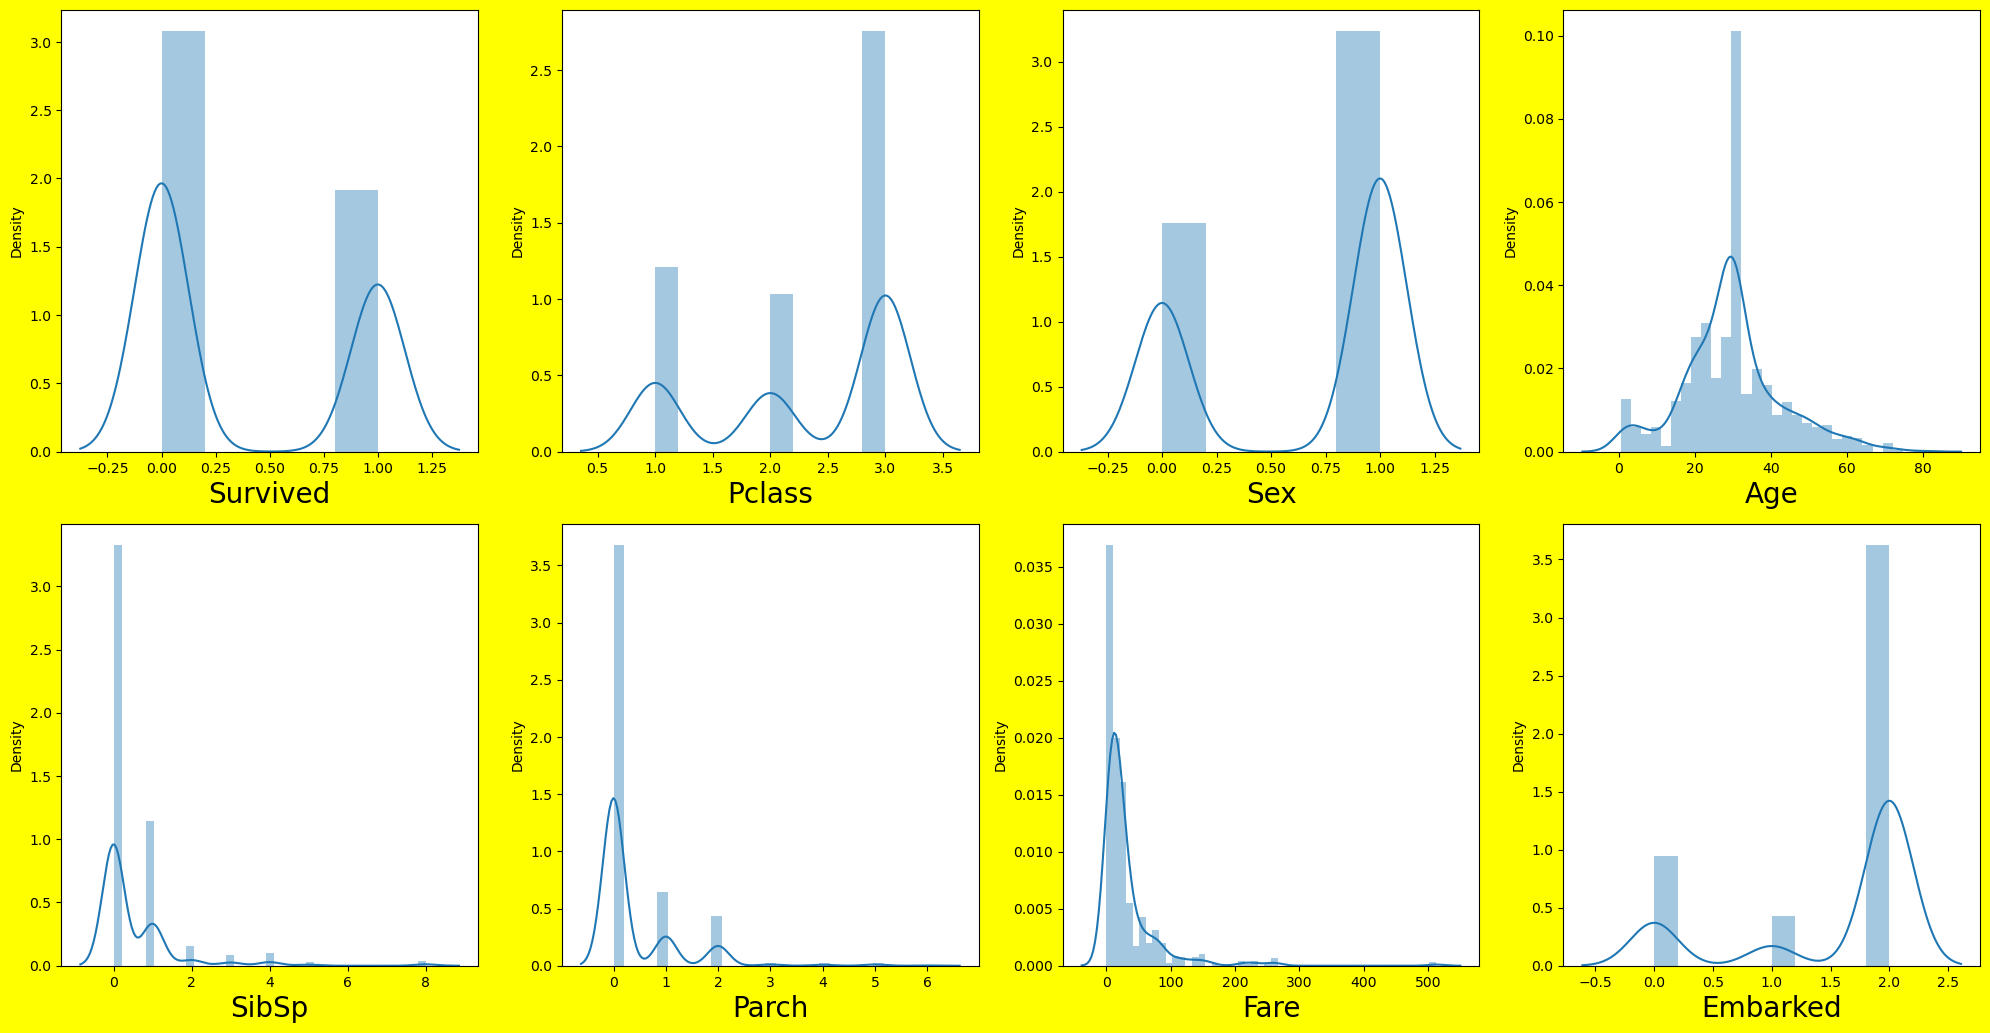

In [31]:
#Lets see how the data is distributed for every column

import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


plt.figure(figsize =(20,15), facecolor = 'yellow')
plotnumber = 1

for column in titanic_df:
    if plotnumber <=8:
        ax = plt.subplot(3,4,plotnumber)
        sns.distplot(titanic_df[column])
        plt.xlabel(column,fontsize = 20)
        
    plotnumber +=1
plt.tight_layout()

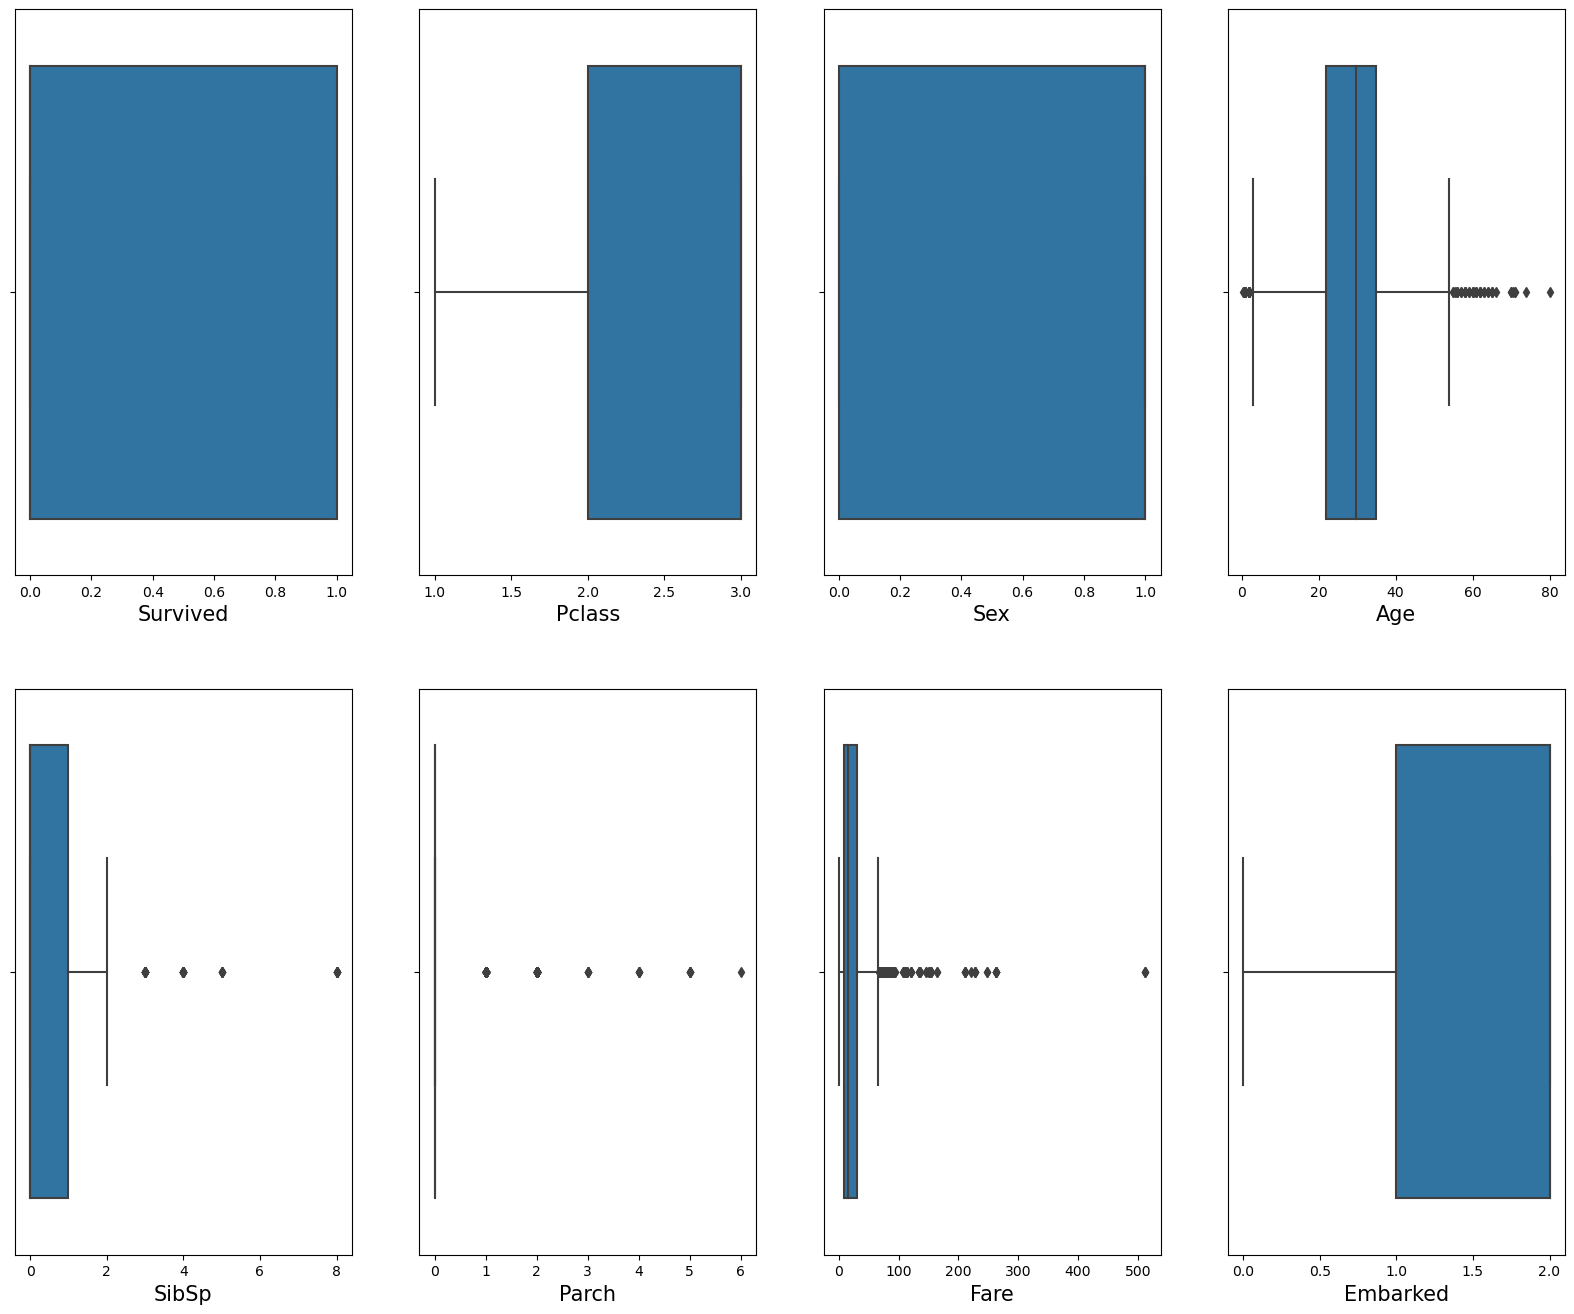

In [32]:
# Now visualize the data using boxplot for getting more idea abot outliers
plt.figure(figsize =(20,25))
graph = 1

for column in titanic_df:
    if graph <=12: # as there are 9 columns in data
        plt.subplot(3,4,graph)
        ax=sns.boxplot(titanic_df[column])
        plt.xlabel(column,fontsize = 15)
        
    graph +=1
plt.show()

- From the boxplot, We noticed that,Outliers are present in Age,SibSp,Parch and Fare columns. 

# Removing outliers using z-score

In [33]:
from scipy.stats import zscore
features=titanic_df[['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked']]
z=np.abs(zscore(features))
z

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,
1,0.827377,0.737695,0.592481,0.432793,0.473674,0.502445,0.585954
2,1.566107,1.355574,0.638789,0.432793,0.473674,0.786845,1.942303
3,0.827377,1.355574,0.284663,0.474545,0.473674,0.488854,0.585954
4,1.566107,1.355574,0.407926,0.432793,0.473674,0.420730,0.585954
5,0.827377,0.737695,0.407926,0.474545,0.473674,0.486337,0.585954
...,...,...,...,...,...,...,...
887,0.369365,0.737695,0.207709,0.474545,0.473674,0.386671,0.585954
888,1.566107,1.355574,0.823344,0.474545,0.473674,0.044381,0.585954
889,0.827377,1.355574,0.000000,0.432793,2.008933,0.176263,0.585954


In [34]:
threshold=3
print(np.where(z>3))

(array([ 13,  16,  25,  27,  50,  59,  68,  71,  86,  88,  96, 116, 118,
       119, 159, 164, 167, 171, 180, 182, 201, 233, 258, 261, 266, 278,
       299, 311, 324, 341, 360, 377, 380, 386, 437, 438, 438, 480, 493,
       527, 541, 542, 557, 567, 610, 630, 638, 672, 678, 679, 683, 686,
       689, 700, 716, 730, 736, 737, 742, 745, 774, 779, 787, 792, 813,
       824, 846, 850, 851, 858, 863, 885], dtype=int64), array([4, 3, 4, 5, 3, 3, 3, 3, 4, 5, 2, 2, 5, 3, 3, 3, 4, 3, 3, 3, 3, 3,
       5, 3, 3, 3, 5, 5, 3, 5, 4, 5, 5, 3, 4, 4, 5, 3, 2, 5, 3, 3, 5, 4,
       4, 2, 4, 2, 4, 5, 3, 3, 5, 5, 5, 5, 4, 5, 5, 2, 4, 5, 3, 3, 3, 3,
       3, 3, 2, 4, 3, 4], dtype=int64))


In [35]:
# Now removing the data above zscore and creating new df
titanic_df_new=titanic_df[(z<3).all(axis=1)]
print("Data with outliers::",titanic_df.shape)
print("Data after removing outliers::",titanic_df_new.shape)

Data with outliers:: (891, 8)
Data after removing outliers:: (820, 8)


In [36]:
a = titanic_df.shape[0]

In [37]:
b = titanic_df_new.shape[0]

In [38]:
print('Data Loss Percentage - ',((a-b)/a)*100)

Data Loss Percentage -  7.968574635241302


- It is affordable loss of data now we will check with IQR method


# IQR Method

In [39]:
# 1st Quantile
Q1 = features.quantile(0.25)

# 3rd Quantile
Q3 = features.quantile(0.75)

In [40]:
# IQR
IQR = Q3 - Q1
IQR

df2 = titanic_df[~((titanic_df < (Q1 - 1.5 * IQR)) |(titanic_df > (Q3 + 1.5 * IQR))).any(axis=1)]
df2.shape

(577, 8)

In [41]:
print('Data Loss Percentage - ',((titanic_df.shape[0]-df2.shape[0])/titanic_df.shape[0])*100)

Data Loss Percentage -  35.24130190796858


- 35.24% is removed using IQR method

- so we are using z-score method

In [42]:
# Now we proceed with new dataset
df=titanic_df_new
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
1,0,3,1,22.000000,1,0,7.2500,2
2,1,1,0,38.000000,1,0,71.2833,0
3,1,3,0,26.000000,0,0,7.9250,2
4,1,1,0,35.000000,1,0,53.1000,2
5,0,3,1,35.000000,0,0,8.0500,2
...,...,...,...,...,...,...,...,...
887,0,2,1,27.000000,0,0,13.0000,2
888,1,1,0,19.000000,0,0,30.0000,2
889,0,3,0,29.699118,1,2,23.4500,2


# Checking For Skewness

In [43]:
df.skew()

Survived    0.450825
Pclass     -0.632242
Sex        -0.664152
Age         0.318314
SibSp       1.979577
Parch       2.122629
Fare        2.318761
Embarked   -1.277386
dtype: float64

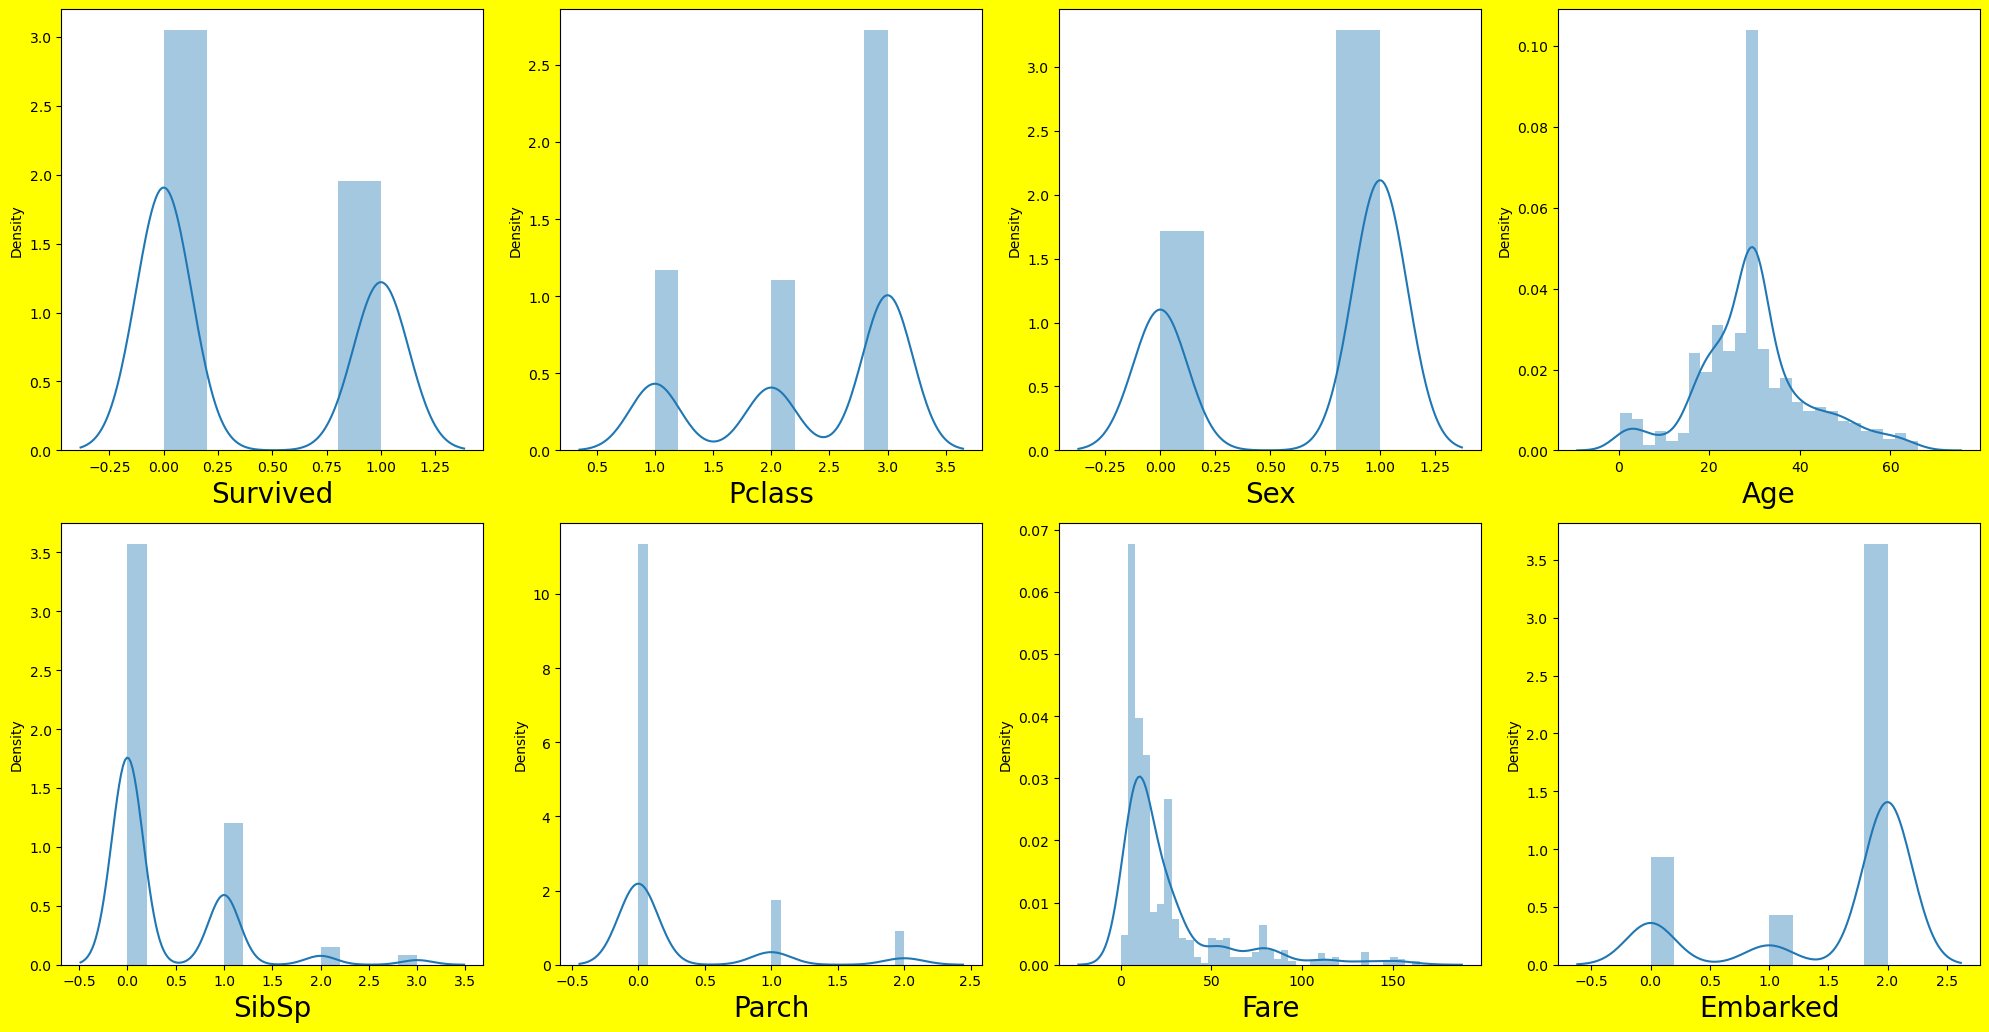

In [44]:
#Lets see how the data is distributed for every column

import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


plt.figure(figsize =(20,15), facecolor = 'yellow')
plotnumber = 1

for column in df:
    if plotnumber <=8:
        ax = plt.subplot(3,4,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize = 20)
        
    plotnumber +=1
plt.tight_layout()

- skewness is present in Pclass, sex, SibSp, Parch, fare and Embarked
- we have to remove skewness only from numerical column not from converted to numerical column,so we have to remove skewness from Pclass, SibSp, Parch, Fare.

In [45]:
df['Pclass']=np.cbrt(df['Pclass'])

In [46]:
df['SibSp']=np.cbrt(df['SibSp'])

In [47]:
df['Parch']=np.cbrt(df['Parch'])

In [48]:
df['Fare']=np.cbrt(df['Fare'])

In [49]:
df.skew()

Survived    0.450825
Pclass     -0.790973
Sex        -0.664152
Age         0.318314
SibSp       1.018770
Parch       1.643259
Fare        0.708623
Embarked   -1.277386
dtype: float64

In [50]:
df.corr()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
Survived,1.000000,-0.319102,-0.554888,-0.090926,0.145722,0.210930,0.363961,-0.154994
Pclass,-0.319102,1.000000,0.133356,-0.333099,-0.111449,-0.070930,-0.712223,0.139257
Sex,-0.554888,0.133356,1.000000,0.094544,-0.213195,-0.256155,-0.268761,0.116708
Age,-0.090926,-0.333099,0.094544,1.000000,-0.112739,-0.253006,0.147130,-0.008781
SibSp,0.145722,-0.111449,-0.213195,-0.112739,1.000000,0.342683,0.376512,-0.048905
Parch,0.210930,-0.070930,-0.256155,-0.253006,0.342683,1.000000,0.298984,-0.024873
Fare,0.363961,-0.712223,-0.268761,0.147130,0.376512,0.298984,1.000000,-0.194147
Embarked,-0.154994,0.139257,0.116708,-0.008781,-0.048905,-0.024873,-0.194147,1.000000


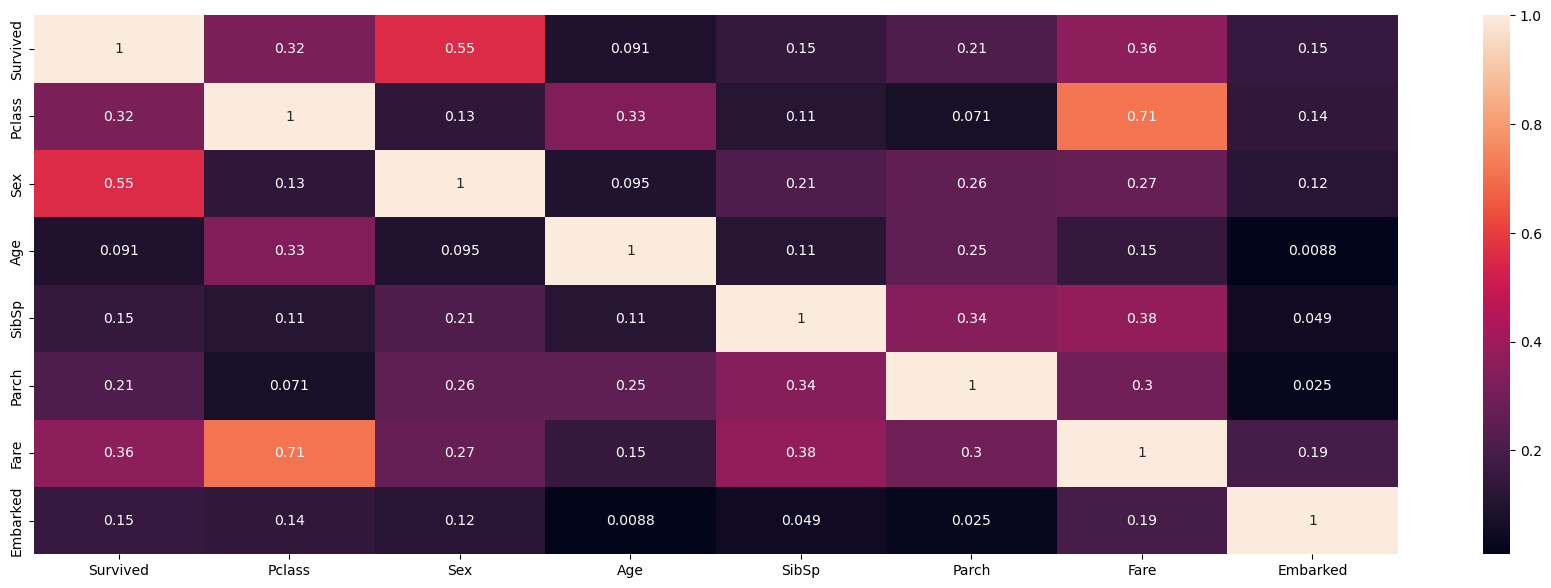

In [51]:
# Plot the heatmap
import matplotlib.pyplot as plt

df_corr=df.corr().abs()
plt.figure(figsize=(22,7))
sns.heatmap(df_corr, annot=True)
plt.show()

- here we can notice that fare and parch are highly corelated with survived and age is negatively corelated with survied

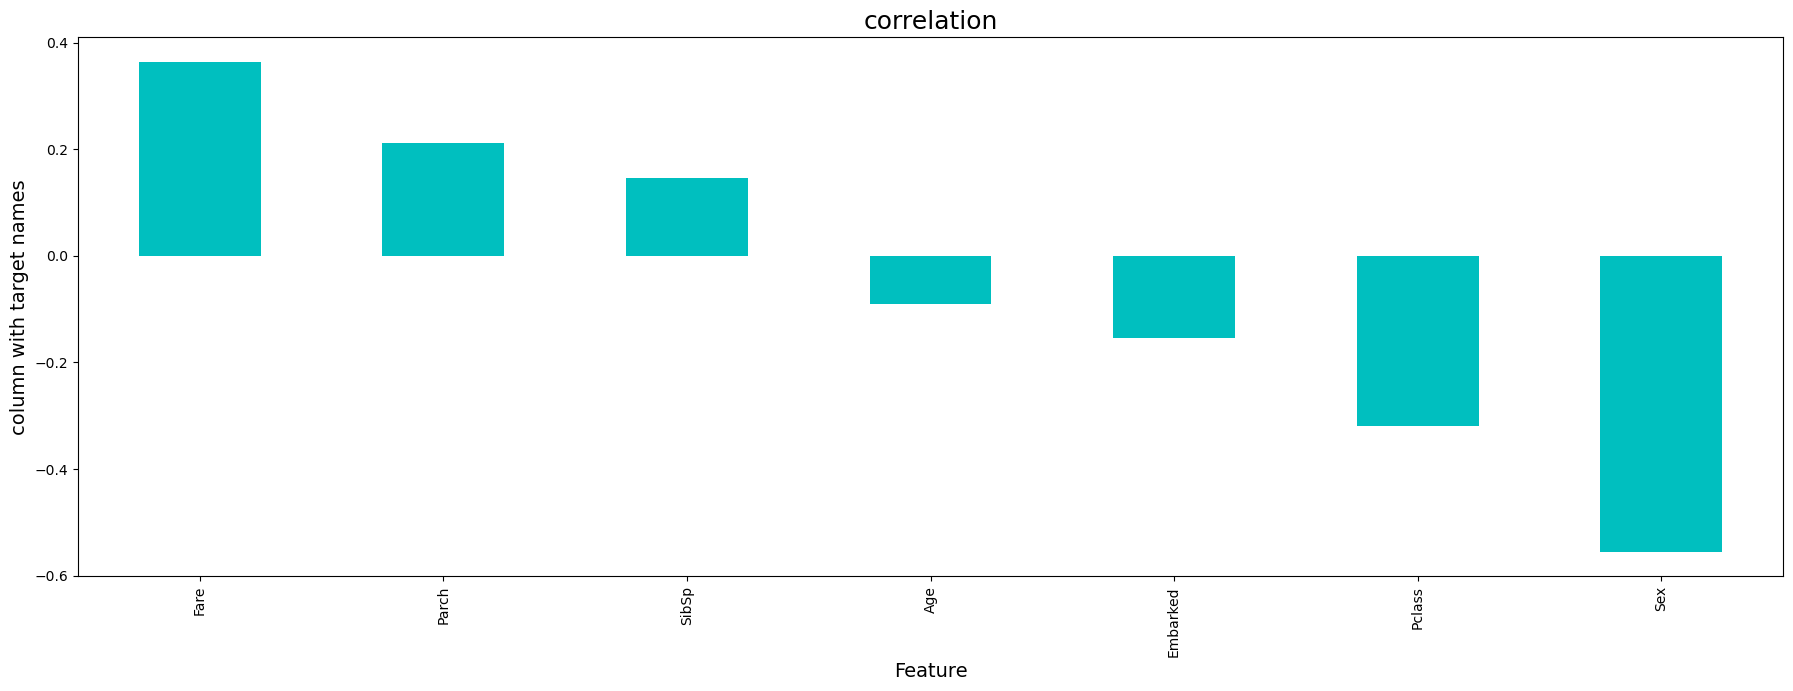

In [52]:
#Checking the columns which are positively and negatively correlated with the quality column

plt.figure(figsize=(22,7))
df.corr()['Survived'].sort_values(ascending=False).drop(['Survived']).plot(kind='bar',color='c')
plt.xlabel('Feature',fontsize=14)
plt.ylabel('column with target names',fontsize=14)
plt.title('correlation',fontsize=18)
plt.show()

- We can see the highest positive correlated column with Survived is fare and parch.


# diving data in (features)x and (lables)y

In [53]:
x= df.drop(['Survived'],axis=1)
y=df['Survived']

In [54]:
x

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,
1,1.442250,1,22.000000,1.0,0.000000,1.935438,2
2,1.000000,0,38.000000,1.0,0.000000,4.146318,0
3,1.442250,0,26.000000,0.0,0.000000,1.993730,2
4,1.000000,0,35.000000,1.0,0.000000,3.758647,2
5,1.442250,1,35.000000,0.0,0.000000,2.004158,2
...,...,...,...,...,...,...,...
887,1.259921,1,27.000000,0.0,0.000000,2.351335,2
888,1.000000,0,19.000000,0.0,0.000000,3.107233,2
889,1.442250,0,29.699118,1.0,1.259921,2.862294,2


In [55]:
y

PassengerId
1      0
2      1
3      1
4      1
5      0
      ..
887    0
888    1
889    0
890    1
891    0
Name: Survived, Length: 820, dtype: int64

# Standardization of data

In [56]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_scaled=pd.DataFrame(scaler.fit_transform(x),columns=x.columns)
x_scaled

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0.798183,0.722036,-0.641702,1.454211,-0.480921,-0.766275,0.583162
1,-1.656644,-1.384973,0.675821,1.454211,-0.480921,1.623850,-1.953669
2,0.798183,-1.384973,-0.312321,-0.627757,-0.480921,-0.703257,0.583162
3,-1.656644,-1.384973,0.428785,1.454211,-0.480921,1.204749,0.583162
4,0.798183,0.722036,0.428785,-0.627757,-0.480921,-0.691984,0.583162
...,...,...,...,...,...,...,...
815,-0.213881,0.722036,-0.229976,-0.627757,-0.480921,-0.316660,0.583162
816,-1.656644,-1.384973,-0.888737,-0.627757,-0.480921,0.500522,0.583162
817,0.798183,-1.384973,-0.007717,1.454211,2.445624,0.235725,0.583162
818,-1.656644,0.722036,-0.312321,-0.627757,-0.480921,0.500522,-1.953669


In [57]:
#Checking multicollinearity among features with variance inflation factor
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['Score']=[variance_inflation_factor(x_scaled,i) for i in range(x_scaled.shape[1])]
vif['features']=x.columns
vif

,Score,features
0,2.381552,Pclass
1,1.139620,Sex
2,1.244679,Age
3,1.311762,SibSp
4,1.315484,Parch
5,2.740889,Fare
6,1.048138,Embarked


- Here we can see that there is no multicollinearity among features as the vif score is under limit<=10.

# Model Building

In [58]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,roc_curve,roc_auc_score,classification_report,confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error,mean_absolute_error, r2_score


In [59]:
# Finding Best Random State
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.30, random_state =i)
    lr = LinearRegression()
    lr.fit(x_train, y_train)
    pred = lr.predict(x_test)
    acc=r2_score(y_test, pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Maximum R2 score is ",maxAccu," on Random_state ",maxRS)

Maximum R2 score is  0.5095664509234383  on Random_state  194


In [60]:
# Splitting data into Train-Test
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=maxRS)

In [61]:
def metric_score(clf,x_train,x_test,y_train,y_test,train=True):
    if train:
        y_pred=clf.predict(x_train)

        print('=======================Train result======================')
        print(f'accuracy score:{accuracy_score(y_train,y_pred)*100:.2f}%')


    elif train==False:
        pred=clf.predict(x_test)

        print('=======================Test Result=======================')
        print(f'accuracy_score:{accuracy_score(y_test,pred)*100:.2f}%')
        print('\n\nClassification report\n',classification_report(y_test,pred,digits=2))

# 1.Logistic Regression

In [66]:
lr=LogisticRegression()
lr.fit(x_train,y_train)
predlr = lr.predict(x_test)
print("Confusion Matrix")
print(confusion_matrix(y_test,predlr))

metric_score(lr,x_train,x_test,y_train,y_test,train=True) #this is for training score
metric_score(lr,x_train,x_test,y_train,y_test,train=False)  ##this is for testing score


Confusion Matrix
[[129  20]
 [ 19  78]]
=======================Train result======================
accuracy score:77.53%
=======================Test Result=======================
accuracy_score:84.15%


Classification report
               precision    recall  f1-score   support

           0       0.87      0.87      0.87       149
           1       0.80      0.80      0.80        97

    accuracy                           0.84       246
   macro avg       0.83      0.83      0.83       246
weighted avg       0.84      0.84      0.84       246



In [63]:
# cv score for Logistic Regression
cvlr=cross_val_score(lr,x,y,cv=5).mean()
print('CV score for Decision Tree Classifier:',cvlr)
print("And Difference between CV and accuracy_score=", accuracy_score(y_test,predlr)-cvlr)

CV score for Decision Tree Classifier: 0.7902439024390244
And Difference between CV and accuracy_score= 0.051219512195121886


# 2.KNN Model

In [64]:
from sklearn.neighbors import KNeighborsClassifier

In [70]:
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train,y_train)
predknn = knn.predict(x_test)
print("Confusion Matrix")
print(confusion_matrix(y_test,predknn))

metric_score(lr,x_train,x_test,y_train,y_test,train=True) #this is for training score
metric_score(lr,x_train,x_test,y_train,y_test,train=False)  ##this is for testing score


Confusion Matrix
[[117  32]
 [ 37  60]]
=======================Train result======================
accuracy score:77.53%
=======================Test Result=======================
accuracy_score:84.15%


Classification report
               precision    recall  f1-score   support

           0       0.87      0.87      0.87       149
           1       0.80      0.80      0.80        97

    accuracy                           0.84       246
   macro avg       0.83      0.83      0.83       246
weighted avg       0.84      0.84      0.84       246



In [68]:
# cv score for KNN Model
cvknn=cross_val_score(knn,x,y,cv=5).mean()
print('CV score for KNN Model:',cvknn)
print("And Difference between CV and accuracy_score=", accuracy_score(y_test,predknn)-cvknn)

CV score for KNN Model: 0.7378048780487806
And Difference between CV and accuracy_score= -0.018292682926829396


# 3 Decision Tree Classifier

In [71]:
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)
preddt = knn.predict(x_test)
print("Confusion Matrix")
print(confusion_matrix(y_test,preddt))

metric_score(dt,x_train,x_test,y_train,y_test,train=True) #this is for training score
metric_score(dt,x_train,x_test,y_train,y_test,train=False)  ##this is for testing score



Confusion Matrix
[[117  32]
 [ 37  60]]
=======================Train result======================
accuracy score:98.61%
=======================Test Result=======================
accuracy_score:76.83%


Classification report
               precision    recall  f1-score   support

           0       0.84      0.77      0.80       149
           1       0.68      0.77      0.72        97

    accuracy                           0.77       246
   macro avg       0.76      0.77      0.76       246
weighted avg       0.78      0.77      0.77       246



In [73]:
# cv score for Decision Tree Classifier
cvdt=cross_val_score(dt,x,y,cv=5).mean()
print('CV score for Decision Tree Classifier:',cvkdt)
print("And Difference between CV and accuracy_score=", accuracy_score(y_test,preddt)-cvdt)

CV score for Decision Tree Classifier: 0.75
And Difference between CV and accuracy_score= -0.029268292682926855


# 4 RandomForestClassifier

In [74]:
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)
predrfc = rfc.predict(x_test)
print("Confusion Matrix")
print(confusion_matrix(y_test,predrfc))

metric_score(rfc,x_train,x_test,y_train,y_test,train=True) #this is for training score
metric_score(rfc,x_train,x_test,y_train,y_test,train=False)  ##this is for testing score



Confusion Matrix
[[123  26]
 [ 17  80]]
=======================Train result======================
accuracy score:98.61%
=======================Test Result=======================
accuracy_score:82.52%


Classification report
               precision    recall  f1-score   support

           0       0.88      0.83      0.85       149
           1       0.75      0.82      0.79        97

    accuracy                           0.83       246
   macro avg       0.82      0.83      0.82       246
weighted avg       0.83      0.83      0.83       246



In [77]:
# cv score for RandomForestClassifier
cvrfc=cross_val_score(rfc,x,y,cv=5).mean()
print('CV score for RandomForestClassifier:',cvrfc)
print("And Difference between CV and accuracy_score=", accuracy_score(y_test,predrfc)-cvrfc)

CV score for RandomForestClassifier: 0.8048780487804879
And Difference between CV and accuracy_score= 0.020325203252032464


# 5 Support vector classifier

In [78]:
svc=SVC()
svc.fit(x_train,y_train)
predsvc = svc.predict(x_test)
print("Confusion Matrix")
print(confusion_matrix(y_test,predsvc))

metric_score(svc,x_train,x_test,y_train,y_test,train=True) #this is for training score
metric_score(svc,x_train,x_test,y_train,y_test,train=False)  ##this is for testing score


Confusion Matrix
[[147   2]
 [ 86  11]]
=======================Train result======================
accuracy score:63.94%
=======================Test Result=======================
accuracy_score:64.23%


Classification report
               precision    recall  f1-score   support

           0       0.63      0.99      0.77       149
           1       0.85      0.11      0.20        97

    accuracy                           0.64       246
   macro avg       0.74      0.55      0.48       246
weighted avg       0.72      0.64      0.55       246



In [79]:
# cv score for SVC
cvsvc=cross_val_score(svc,x,y,cv=5).mean()
print('CV score for SVC:',cvsvc)
print("And Difference between CV and accuracy_score=", accuracy_score(y_test,predsvc)-cvsvc)

CV score for SVC: 0.6439024390243903
And Difference between CV and accuracy_score= -0.001626016260162566


# 6 ADA BOOST CLASSIFIER

In [80]:
adb=AdaBoostClassifier()
adb.fit(x_train,y_train)
predadb = adb.predict(x_test)
print("Confusion Matrix")
print(confusion_matrix(y_test,predadb))

metric_score(adb,x_train,x_test,y_train,y_test,train=True) #this is for training score
metric_score(adb,x_train,x_test,y_train,y_test,train=False)  ##this is for testing score


Confusion Matrix
[[122  27]
 [ 18  79]]
=======================Train result======================
accuracy score:82.75%
=======================Test Result=======================
accuracy_score:81.71%


Classification report
               precision    recall  f1-score   support

           0       0.87      0.82      0.84       149
           1       0.75      0.81      0.78        97

    accuracy                           0.82       246
   macro avg       0.81      0.82      0.81       246
weighted avg       0.82      0.82      0.82       246



In [82]:
# cv score for ADA BOOST CLASSIFIER
cvadb=cross_val_score(adb,x,y,cv=10).mean()
print('CV score for ADA BOOST CLASSIFIER:',cvadb)
print("And Difference between CV and accuracy_score=", accuracy_score(y_test,predadb)-cvadb)

CV score for ADA BOOST CLASSIFIER: 0.7963414634146341
And Difference between CV and accuracy_score= 0.02073170731707319


# 7 BAGGING CLASSIFIER

In [83]:
bgc=BaggingClassifier()
bgc.fit(x_train,y_train)
predbgc = bgc.predict(x_test)
print("Confusion Matrix")
print(confusion_matrix(y_test,predbgc))

metric_score(bgc,x_train,x_test,y_train,y_test,train=True) #this is for training score
metric_score(bgc,x_train,x_test,y_train,y_test,train=False)  ##this is for testing score


Confusion Matrix
[[128  21]
 [ 21  76]]
=======================Train result======================
accuracy score:97.21%
=======================Test Result=======================
accuracy_score:82.93%


Classification report
               precision    recall  f1-score   support

           0       0.86      0.86      0.86       149
           1       0.78      0.78      0.78        97

    accuracy                           0.83       246
   macro avg       0.82      0.82      0.82       246
weighted avg       0.83      0.83      0.83       246



In [85]:
# cv score for BAGGING CLASSIFIER
cvbgc=cross_val_score(bgc,x,y,cv=10).mean()
print('CV score for BAGGING CLASSIFIER:',cvbgc)
print("And Difference between CV and accuracy_score=", accuracy_score(y_test,predbgc)-cvbgc)

CV score for BAGGING CLASSIFIER: 0.7878048780487805
And Difference between CV and accuracy_score= 0.04146341463414627


# 8 Gradient Boosting classifier

In [86]:
grbc=GradientBoostingClassifier()
grbc.fit(x_train,y_train)
predgrbc = grbc.predict(x_test)
print("Confusion Matrix")
print(confusion_matrix(y_test,predgrbc))

metric_score(grbc,x_train,x_test,y_train,y_test,train=True) #this is for training score
metric_score(grbc,x_train,x_test,y_train,y_test,train=False)  ##this is for testing score


Confusion Matrix
[[131  18]
 [ 15  82]]
=======================Train result======================
accuracy score:91.29%
=======================Test Result=======================
accuracy_score:86.59%


Classification report
               precision    recall  f1-score   support

           0       0.90      0.88      0.89       149
           1       0.82      0.85      0.83        97

    accuracy                           0.87       246
   macro avg       0.86      0.86      0.86       246
weighted avg       0.87      0.87      0.87       246



In [87]:
# cv score for Gradient Boosting classifier
cvgrbc=cross_val_score(grbc,x,y,cv=10).mean()
print('CV score for Gradient Boosting classifier:',cvgrbc)
print("And Difference between CV and accuracy_score=", accuracy_score(y_test,predgrbc)-cvgrbc)

CV score for Gradient Boosting classifier: 0.8146341463414635
And Difference between CV and accuracy_score= 0.051219512195121886


# We choose ada boost classifier for hyperparameter tuning because training and test accuracy are good

# HYPER PARAMETER TUNING

In [91]:
from sklearn.model_selection import GridSearchCV
adb=AdaBoostClassifier()
parameters={'algorithm' : ['SAMME.R'],'n_estimators':[50,200,10],'learning_rate':[0.1,0.5,1.0],'random_state':[10]}

GCV = GridSearchCV(estimator =adb,param_grid=parameters,cv=10,scoring='accuracy')
GCV.fit(x_train,y_train) #fitting data into the model
GCV.best_params_ #printing the best parameters found by the GridSearchCV

{'algorithm': 'SAMME.R',
 'learning_rate': 0.5,
 'n_estimators': 200,
 'random_state': 10}

In [92]:
GCV_pred=GCV.best_estimator_.predict(x_test) #predicting with the best parameters
accuracy_score(y_test,GCV_pred) #Checking Final Accuracy

0.8292682926829268

# Our best model with best parameters has given an excellent accuracy of 83%

# roc auc curve

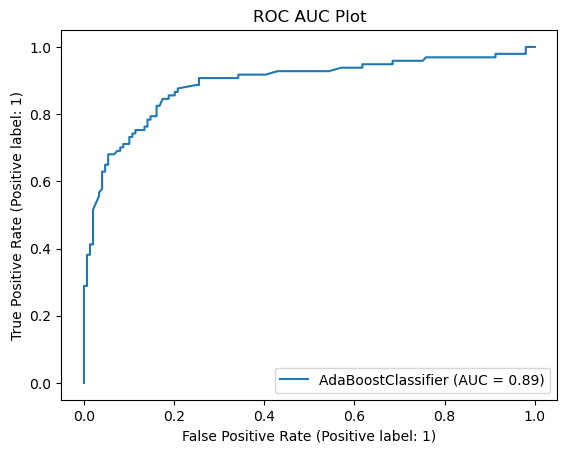

In [94]:
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import plot_roc_curve

plot_roc_curve(GCV.best_estimator_,x_test,y_test)
plt.title("ROC AUC Plot")
plt.show()

# Saving the best classification model

In [95]:
import pickle
filename = 'titanic.pkl'
pickle.dump(GCV,open(filename,'wb'))

In [96]:
loaded_model = pickle.load(open('titanic.pkl','rb'))
result = loaded_model.score(x_test,y_test)
print(result*100)

82.92682926829268


In [97]:
### Predicting the Output
original = np.array(y_test)
predicted = np.array(loaded_model.predict(x_test))
df_new = pd.DataFrame({"Original":original,"Predicted":predicted},index= range(len(original)))
df_new.sample(20)

,Original,Predicted
188,1,1
29,1,1
134,1,1
207,0,0
27,0,0
181,0,0
198,0,0
157,0,0
209,1,1
114,0,0


In [98]:
auc_score=roc_auc_score(y_test,predicted)
print(auc_score)


0.826679582093683


# Conclusion:--
# We can see our model has predicted almost same ouputs.
# Here we can see that the area under the curve is 89% which is a very good score
# The prediction results indicated that Ada Boost Classifier model achieved excellent prediction accuracy.